# Exercise 1

## Problem 1
In this problem we will start looking at a very simple machine learning pipeline.
We will upload a dataset, perform exploratory data analysis, train some models, and evaluate their performance.

We will work with the California Housing dataset from https://github.com/ageron/handson-ml2/tree/master/datasets/housing.

Our goal is to predict the `median_house_value` by using the other predictors (i.e., columns) of the dataset.

In [211]:
 %matplotlib inline


ParserError: Error tokenizing data. C error: Expected 1 fields in line 29, saw 376


In [178]:
import matplotlib.pyplot as plt

### 1. Load housing dataset

* Import the `numpy` library as `np`, and `pandas` library as `pd`.

In [179]:
import numpy as np
import pandas as pd

* Upload the housing dataset `"housing.csv` using the `read_csv()` function from `pandas`. Name the dataframe `housing`.


In [180]:
housing=pd.read_csv("housing.csv")

### 2. Quick look at the data
The `housing` dataframe is an object of class `DataFrame`. This class has several methods that allow you to look and modify the data. 
Here, we try to understand the dataset by calling the methods `head()`, `info()`, and `describe()`.

* What is the difference between the three methods?
* What are the data types of the columns (i.e., quantitative or qualitative)?
* Are there missing values (e.g., NAs)?
* Count the number of rows and column in `housing`.

In [181]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [182]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [183]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [184]:
housing[housing.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [185]:
housing=housing.dropna()

### 3. Exploratory data analysis

We want to better understand the dataset at hand by performing some exploratory data analysis.

* Import the `scatter_matrix` function from the `plotting` package of the `pandas` library.

In [186]:
from pandas import plotting
housing_num = housing.select_dtypes(include=[np.float])


* Call the `scatter_matrix` function only on the quantitative variables of the `housing` dataset.

C:\Users\vicki_la_tombe\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='households', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='longitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='population', ylabel='latitude'>,
        <AxesSubplot:xlabel='

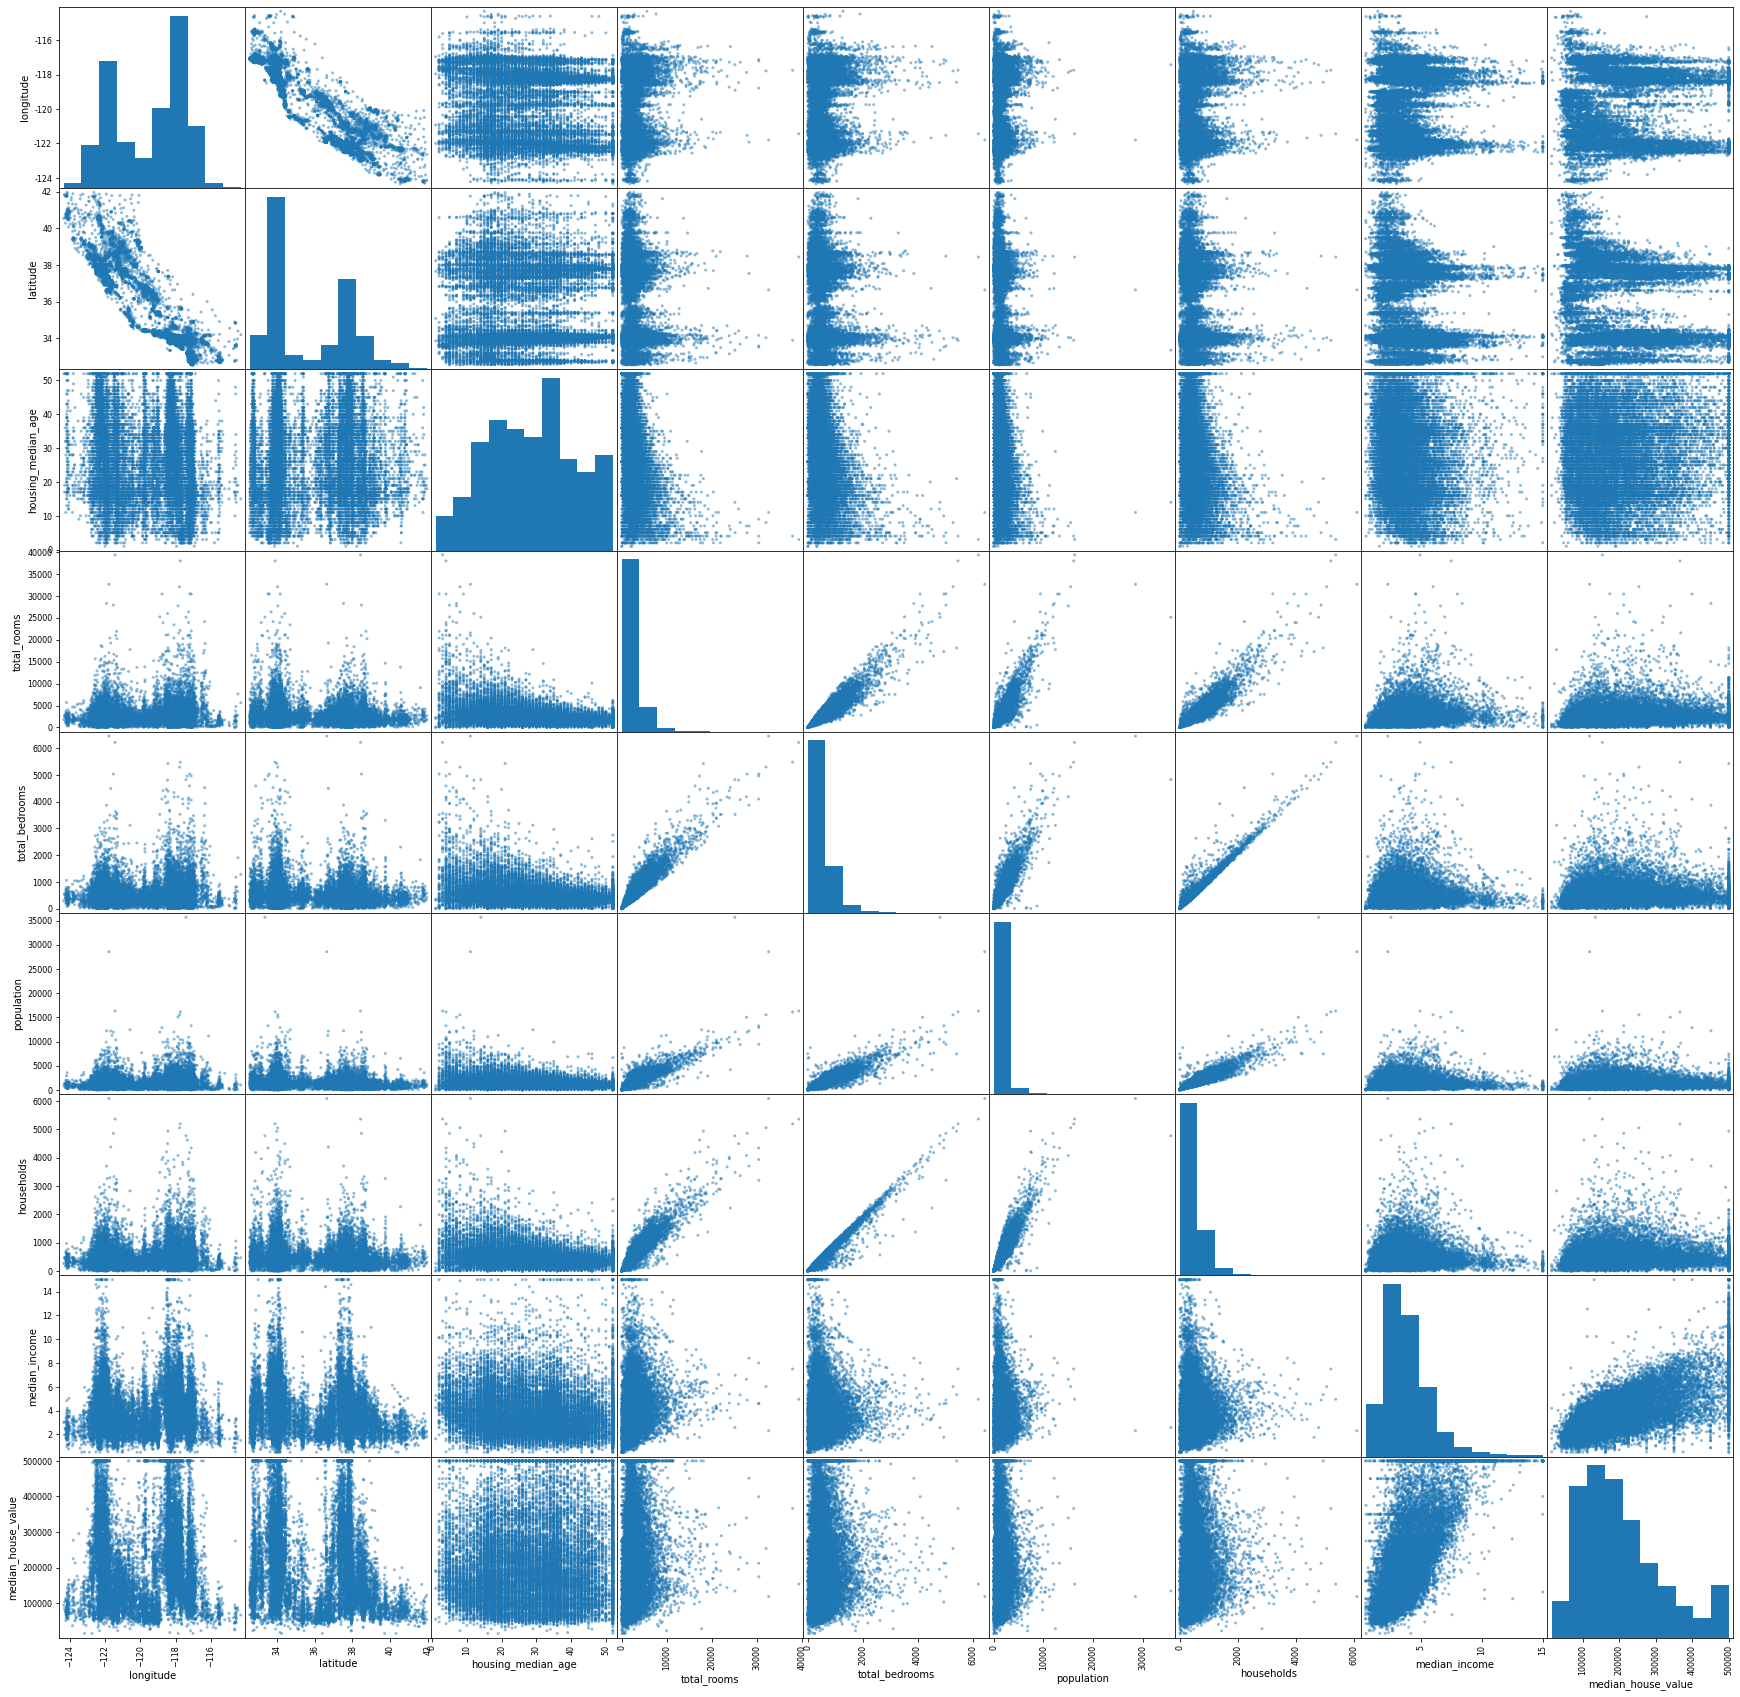

In [187]:
plotting.scatter_matrix(housing_num,figsize=(30,30))

* What is the most promising feature to predict `median_house_value`?

`median_income`

* Are there some features that have a strong skewed distribution? If so, what transformation could help?

All except `longitude`, `latitude` and `housing_median_age`
They are all strongly positively skewed except for `median_income`. We then apply $log(max_j(x_j)+1-x_i)$, and $sqrt(max_j(x_j)+1-x_i)$ to `median_income`

* Are there some features that are strongly correlated with each other?

In [188]:
  from sklearn.linear_model import LinearRegression
corr_df=pd.DataFrame({col : [0]*9 for col in housing_num.columns},index=[col for col in housing_num.columns])
for col1 in housing_num.columns:
    for col2 in housing_num.drop([col1],axis=1).columns:
        model = LinearRegression()
        model.fit(np.array(housing_num[col1]).reshape((-1, 1)),np.array(housing_num[col2]))
        corr_df.loc[col1,col2]=model.score(np.array(housing_num[col1]).reshape((-1, 1)),np.array(housing_num[col2]))


In [189]:
corr_df[corr_df>0.75].dropna(how='all').dropna(how='all',axis=1)

,longitude,latitude,total_rooms,total_bedrooms,population,households
longitude,NaN,0.854915,NaN,NaN,NaN,NaN
latitude,0.854915,NaN,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,0.865606,NaN,0.844545
total_bedrooms,NaN,NaN,0.865606,NaN,0.770439,0.959867
population,NaN,NaN,NaN,0.770439,NaN,0.822986
households,NaN,NaN,0.844545,0.959867,0.822986,NaN


### 4. Simple data transformations

Here, we perform some data transformations, such as data cleaning and feature engineering.

* Let us start by removing any row containing NAs.

In [190]:
#already done

Consider the columns `total_rooms` and `total_bedrooms`, which describe the total number of rooms and bedrooms in a district, and  `population` and `households`, which describe the population and the number of households in a district.
It is not very useful to know the total number of rooms if we don't know the total number of bedrooms.
Similarly, the total number of rooms in a district is not very useful if we don't know the number of households.
Finally, one might be interested in the number of people per household, rather than the total population itself.

* Based on the observations above, create 3 new features (i.e., columns) that can be more useful than the existing  `total_rooms`, `total_bedrooms`, `population`, and `households`.

In [191]:
housing['ratio_bedroom_room']=housing.apply(lambda row: row.total_bedrooms/row.total_rooms,axis=1)
housing['rooms_per_household']=housing.apply(lambda row: row.total_rooms/row.households,axis=1)
housing['people_per_household']=housing.apply(lambda row: row.population/row.households,axis=1)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ratio_bedroom_room,rooms_per_household,people_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.224625,5.045455,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.215208,6.114035,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.215173,5.205543,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.219892,5.329513,2.123209


In [192]:
housing[housing['people_per_household']>10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ratio_bedroom_room,rooms_per_household,people_per_household
91,-122.28,37.80,52.0,215.0,87.0,904.0,88.0,0.8668,137500.0,NEAR BAY,0.404651,2.443182,10.272727
270,-122.18,37.78,33.0,142.0,31.0,575.0,47.0,3.8750,225000.0,NEAR BAY,0.218310,3.021277,12.234043
1039,-120.97,38.42,16.0,1748.0,322.0,4930.0,287.0,4.3029,121900.0,INLAND,0.184211,6.090592,17.177700
1067,-121.85,39.73,52.0,444.0,80.0,1107.0,98.0,3.4191,137500.0,INLAND,0.180180,4.530612,11.295918
1617,-122.08,37.84,17.0,1320.0,159.0,1722.0,141.0,11.7064,500001.0,NEAR BAY,0.120455,9.361702,12.212766
2511,-119.54,36.51,36.0,49.0,7.0,28.0,2.0,4.6250,162500.0,INLAND,0.142857,24.500000,14.000000
2723,-115.50,32.75,13.0,330.0,72.0,822.0,64.0,3.4107,142500.0,INLAND,0.218182,5.156250,12.843750
2899,-119.01,35.37,35.0,120.0,35.0,477.0,41.0,1.9125,47500.0,INLAND,0.291667,2.926829,11.634146
3364,-120.51,40.41,36.0,36.0,8.0,4198.0,7.0,5.5179,67500.0,INLAND,0.222222,5.142857,599.714286
4479,-118.16,34.07,41.0,247.0,55.0,925.0,50.0,3.5769,135700.0,<1H OCEAN,0.222672,4.940000,18.500000


* At this point, look at the scatter matrix of the 3 newly created columns. Is the skewness of some of the new variables better compared to  `total_rooms`, `total_bedrooms`, `population`, and `households`?

C:\Users\vicki_la_tombe\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='ratio_bedroom_room', ylabel='ratio_bedroom_room'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='ratio_bedroom_room'>,
        <AxesSubplot:xlabel='people_per_household', ylabel='ratio_bedroom_room'>],
       [<AxesSubplot:xlabel='ratio_bedroom_room', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='people_per_household', ylabel='rooms_per_household'>],
       [<AxesSubplot:xlabel='ratio_bedroom_room', ylabel='people_per_household'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='people_per_household'>,
        <AxesSubplot:xlabel='people_per_household', ylabel='people_per_household'>]],
      dtype=object)

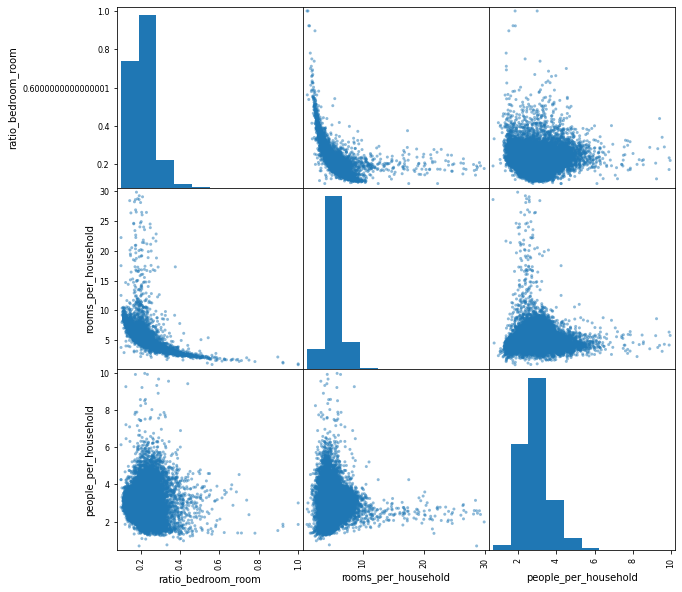

In [193]:
plotting.scatter_matrix(
    housing[
        (housing['people_per_household']<10) & (housing['rooms_per_household']<30)
            ].iloc[:,-3:],
    figsize=(10,10)
    )

* Compute the correlation among the  3 new variables. Also, compute the correlation between  `total_rooms`, `total_bedrooms`, `population`, and `households`. What do you observe?

In [194]:
from sklearn.linear_model import LinearRegression
housing_new=housing.iloc[:,-3:]
corr_housing_new=pd.DataFrame({col : [0]*3 for col in housing_new.columns},index=[col for col in housing_new.columns])
for col1 in housing_new.columns:
    for col2 in housing_new.drop([col1],axis=1).columns:
        model = LinearRegression()
        model.fit(np.array(housing_new[col1]).reshape((-1, 1)),np.array(housing_new[col2]))
        corr_housing_new.loc[col1,col2]=model.score(np.array(housing_new[col1]).reshape((-1, 1)),np.array(housing_new[col2]))

In [195]:
print(corr_df.loc[['total_rooms','total_bedrooms','households']][['total_rooms','total_bedrooms','households']])
print(corr_housing_new)

                total_rooms  total_bedrooms  households
total_rooms        0.000000        0.865606    0.844545
total_bedrooms     0.865606        0.000000    0.959867
households         0.844545        0.959867    0.000000
                      ratio_bedroom_room  rooms_per_household  \
ratio_bedroom_room              0.000000             0.173849   
rooms_per_household             0.173849             0.000000   
people_per_household            0.000009             0.000024   

                      people_per_household  
ratio_bedroom_room                0.000009  
rooms_per_household               0.000024  
people_per_household              0.000000  


The column `ocean_proximity` is a qualitative variable with different categories. It is always good to convert qualitative variables into quantitative before fitting machine learning models. To do so, we will use the `OrdinalEncoder` function from the `preprocessing` package of the `sklearn` library.

* Import the `OrdinalEncoder` function.

In [196]:
from sklearn import preprocessing

We first instantiate an object from class `OrdinalEncoder` and we call it `my_ordinal_encoder`.

In [197]:
my_ordinal_encoder=preprocessing.OrdinalEncoder()

Create a new column named `ocean_proximity_enc` by transforming the `ocean_proximity` column with the `my_ordinal_encoder.fit_transform` function.

_Hint_: Make sure you access the `ocean_proximity` column with the double bracket `[[` and not with the single bracket `[`.

In [198]:
housing['ocean_proximity_enc']=my_ordinal_encoder.fit_transform(housing[['ocean_proximity']])

### 5. Split data into train and test 

If we fit and evaluate our model on the same data we obtain overly optimistic results. For this reason, we have to split the dataset into a train and test part.

* Split the data by keeping 20% of the observations in the test set. Set the random seed to `42`. Fill the `??` below.

In [199]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [200]:
housing_train, housing_test = train_test_split(housing, test_size = 0.2, random_state = 42)

### 6. Fit simple models

We are now almost ready to fit our first two models, KNN and LinearRegression. Before doing so, let us split the data into predictors and response.

* Split the `housing` dataset into predictors `X` and response `y`. From `X`, remove the columns `total_rooms`, `total_bedrooms`, `population`, `households`, and `ocean_proximity`.

In [201]:
x=housing_train.drop(['median_house_value','total_rooms','total_bedrooms','population','households','ocean_proximity'],axis=1)
y=housing_train['median_house_value']

* Let us first fit a KNN model (fill the `??`).

In [202]:
from sklearn.neighbors import KNeighborsRegressor

In [203]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x, y)

KNeighborsRegressor(n_neighbors=10)

* Let us now fit a Linear Regression model (fill the `??`)

In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

### 7. Make predictions and evaluate models

We now want to make some predictions on test set, i.e., `X_test`, and to evaluate how well the models perform.

* Create the `X_test` and `y_test`.

In [206]:
x_test=housing_test.drop(['median_house_value','total_rooms','total_bedrooms','population','households','ocean_proximity'],axis=1)
y_test=housing_test['median_house_value']

* Predict the fitted models on the test set `X_test`.

_Hint_: use the `<fitted_object>.predict` function.

In [207]:
knn_pred=knn.predict(x_test)
linreg_pred=lin_reg.predict(x_test)

* Evaluate the performance of the models using the root mean square error (RMSE). Fill the `??`.

In [208]:
from sklearn.metrics import mean_squared_error

In [209]:
np.sqrt(mean_squared_error(knn_pred, y_test))

61750.62454161101

In [176]:
np.sqrt(mean_squared_error(linreg_pred, y_test))

73364.54475126242

## Problem 2
In this problem, we show that the regression function $f^*(x) := \operatorname{E}[Y \mid X = x]$, $x \in \mathbb{R}^p$, is **optimal** in the sense that it minimizes the expected squared prediction error.

In particular, for a fixed predictor value $x \in \mathbb{R}^p$, we want to show that

$$f^*(x) = 
\underset{f(x)}{\operatorname{arg min}} \operatorname{E}\left[\left(Y - f(x)\right)^2 \mid X = x\right].$$


### Answer 2
\begin{align*}
&&\frac{\partial}{\partial f(x)}\operatorname{E}\left[\left(Y - f(x)\right)^2 \mid X = x\right] &=0\\
\Leftrightarrow &&\operatorname{E}\left[\frac{\partial}{\partial f(x)}\left(\left(Y - f(x)\right)^2\right) \mid X = x\right] &=0&\text{by linearity of }\operatorname{E}\\
\Leftrightarrow &&\operatorname{E}\left[-2\cdot\left(Y - f(x)\right) \mid X = x\right]&=0\\
\Leftrightarrow &&-2\operatorname{E}\left[Y - f(x) \mid X = x\right]&=0&\text{by linearity of }\operatorname{E}\\
\Leftrightarrow &&\operatorname{E}\left[Y - f(x) \mid X = x\right]&=0&\\
\Leftrightarrow &&\operatorname{E}\left[Y \mid X=x\right]&=\operatorname{E}\left[f(x) \mid X=x\right]&\text{by linearity of }\operatorname{E}\\
\Leftrightarrow &&\operatorname{E}\left[Y \mid X=x\right]&=f(x)&\text{RHS is deterministic}
\end{align*}

Moreover,
\begin{equation}
\frac{\partial^2}{\partial f(x)^2}\operatorname{E}\left[\left(Y - f(x)\right)^2 \mid X =x\right]=\operatorname{E}\left[\frac{\partial}{\partial f(x)}\left(-2\cdot\left(Y - f(x)\right)\right) \mid X = x\right]=E\left[2 \mid X=x\right]=2>0,
\end{equation}
meaning the function to minimise is convex.

Therefore the function minimizing MSE is $f^*(x):= \operatorname{E}[Y \mid X = x]$